# COGS 118A - Final Project

# Predicting Uniqlo Stock Prices using Random Forest Algorithm

## Group members

- Brian Chen
- Jeffrey Chen
- Vivian Cheung
- Zhangxiang Lu

# Abstract 
In this project, our goal is to predict Uniqlo closing stock prices from a dataset we procured from Kaggle. Each data point in our dataset contains Uniqlo opening, high, low, and closing stock prices as well as volume of stocks traded and trading values from Jan 2012 - Dec 2016. This data was taken from the Japanese stock market. With our data we will be using a random forest model along with k-fold cross validation to predict closing stock prices per day. To evaluate the success of our model we will compare our predictions to the actual Uniqlo closing stock price. Our model's performance will be evaluated on statistical metrics such as root mean square error, mean absolute error, and mean squared error. After running our 

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

# Background

Predicting stock prices has been a popular research area in the field of machine learning and finance for a long time. Various studies have been conducted to predict stock prices using different algorithms and techniques. The majority of these studies have focused on analyzing historical stock price data, company financial reports, and other macroeconomic indicators to make predictions about future stock prices.

One popular approach to stock price prediction is time series analysis. Time series analysis involves using past prices and other relevant variables to forecast future prices. There are many different models that can be used for time series analysis, including autoregressive integrated moving average (ARIMA) models, autoregressive conditional heteroscedasticity (ARCH) models, and recurrent neural networks (RNNs) <a name="Tsay"></a>[<sup>[1]</sup>](#Tsay) <a name="Engle"></a>[<sup>[2]</sup>](#Engle) <a name="Hochreiter"></a>[<sup>[3]</sup>](#Hochreiter).

Another popular approach to stock price prediction is machine learning. Machine learning algorithms can be trained to learn patterns in historical data and use those patterns to make predictions about future prices. Popular machine learning algorithms for stock price prediction include support vector machines (SVMs), random forests, and gradient boosting machines (GBMs) <a name="Zhang"></a>[<sup>[4]</sup>](#Zhang) <a name="Zhang2"></a>[<sup>[5]</sup>](#Zhang2).

In recent years, deep learning techniques such as convolutional neural networks (CNNs) and long short-term memory (LSTM) networks have been applied to stock price prediction with promising results. These techniques can capture complex patterns in historical data and make accurate predictions about future prices <a name="Zhang3"></a>[<sup>[6]</sup>](#Zhang3) <a name="Qiu"></a>[<sup>[7]</sup>](#Qiu).

# Problem Statement

Originally in this project we aimed to use a Random Forest Algorithm to predict the daily closing values of Uniqlo's stock from January 2012 - December 2016. When delving into the problem of implementing the model, however, it ended up being more prudent to predict stock price movement through a different, industry-relevant metric: *the five-day percent change in the stock closing price*. This metric provides a better idea of overall stock price movement for any potential investors and is less subject to day-to-day volatility. To accomplish this, we will analyze factors such as opening stock price, daily highs and lows, trading volume, and trading value of Uniqlo stock. We will also create new features for our data set based off the commonly used Moving Average and Relative Strength Index indicators for stock trading. 

Since our data is procured from the Tokyo Stock Exchange, we will be quantifying stock prices in terms of Japanese Yen (¥) to match our dataset. Furthermore, our problem is measureable because we can calculate our model's accuracy by taking the difference between our model's predicted closing stock prices and the actual closing stock prices and measure error with metrics such as Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), or Mean Squared Error (MSE). Finally, our problem is replicable because a machine learning model can be used to predict more recent Uniqlo closing stock prices such as from 2017 to 2023.

# Data

Link to our dataset: https://www.kaggle.com/datasets/daiearth22/uniqlo-fastretailing-stock-price-prediction

Our dataset contains 1227 observations organized by date and 7 variables. Each observation consists of a date, opening price, high, low, closing price, volume, and stock trading value. We consider "opening price", "high", "low", "closing price", "volume", and "stock trading" to be critical variables. Every variable is represented by an integer value and every variable except volume is in terms of Japanese Yen ¥. 

### Data Cleaning and Transformations

In terms of cleaning and transformations for our data, we did not have to do much. We planned on using all the variables included within the training dataset, with only minor modifications. We had originally planned to set the "date" values as the indices for our new dataset but these plans were stymied by the discontinuity of date values. Given stock market regulations, trading does not occur on weekends or holidays, leaving irregular holes in our date values. Thus, we stuck to using numerical indices from 1 through 1226.

Both the training and test datasets were also in reverse-chronological order, meaning one of our first steps was reversing the datasets and validating the new datasets were in the correct order. Furthermore, we changed the "stock trading" column into a "trading value" column to better convey the actual significance of the variable's values. 

As part of our feature engineering, which we cover down below, we created multiple moving-average variables, the longest of which spans 200 days. In order to appropriately calculate and utilize this metric, we applied the calculation to the whole dataset and then dropped the first 200 data points from the actual training set. This is because for those first 200 data points, there was not sufficient data before those dates to calculate a 200-day moving average, and they would have introduced null-values that the model was not prepared to handle. The remaining 1027 data points will be used in a chronological 85/15 train/test split.

### Updating Prediction Variable

After conducting research, we learned about the five-day percent change as an industry-relevant metric for predicting stock price movement, which we chose to predict as opposed to closing prices.

### Feature Engineering

After creating a preliminary random forest regression model and fitting it to our training dataset to predict closing prices, we found that its performance in terms of MSE was significantly worse than that of our benchmark linear regression model. We then feature engineered more predictor variables, namely moving averages (MA), relative strength indices (RSI), and daily volume changes. Using the talib library and dataframe methods, we created moving average and relative strength index features for spans of 14, 30, 50, and 200 days. This allowed us to get better performance out of our random forest regression model and a better MSE than our benchmark linear regression model.

# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared.

Using our Uniqlo dataset, we want to predict its closing stock price, while measuring performance. To do so, our project will utilize the Random Forest algorithm, which we believe will work based on the past success of others who have it used for stock prediction. We will run the model using various combinations of the possible features ("opening price", "high", "low", "closing price", "volume", and "stock trading") in order to determine which features result in the best performance. High performing features will result in the lowest MSE between actual and predicted closing prices. We will use K-Fold cross validation since our sample size is low (1227) to assess our model's performance and make the most of our small dataset. Some libraries that we plan to use are NumPy, SKlearn, and Matplotlib. We plan to use linear regression as a benchmark model to compare our random forest model's performance against.

# Evaluation Metrics

When evaluating the success of our model, we will compare the predictions to the actual Uniqlo stock prices. For our evaluation metrics, we plan to use statistical metrics such as root mean square error, mean absolute error, and mean squared error for calculating risks and evaluating the prediction accuracy. 

Mean absolute error is the absolute difference between the predicted and actual values, which can help with evaluating the size of the error. MAE is calculated by $MAE=(1/n)*\sum |y_i-\hat{y}_i|$

Mean squared error is the average of the squared differences between the predicted and actual values. This essentially plays a similar role to MAE, but gives more weight to larger errors. This lends itself useful in the context of our project if we want to evaluate our errors with significantly incorrect stock value predictions. The equation for MSE is $MSE=(1/n)*\sum(y_i-\hat{y}_i)^2$

Finally, the last of the statistical metrics we'll use is root mean squared error, which essentially takes the square root of the MSE and similarly penalizes larger errors more than smaller errors, just in a more readable way. It's calculated by $RMSE=\sqrt{(1/n)*\sum(y_i-\hat{y}_i)^2}$

The reason why we selected MSE and RMSE in particular is due in part to the fact that stock predictions carry a lot of weight in that they can cause people to potentially gain or lose a significant amount of money. Therefore, these two evaluation metrics in particular will call attention to poor prediction models that have large errors. Therefore, we can minimize the risk of significantly penalizing those who use this model as financial advice. 

Overall, the goal is to ensure that it is accurately predicting the direction of the stock and the amount it increases/decreases by. As our dataset has already been separated into training and testing data, we will use the cleaned dataset to evaluate the success of our prediction model and its accuracy using these statistical metrics.

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Baseline Linear Regression

During our data exploration process, we discovered that the closing prices of Uniqlo from 2012-2016 were fairly linear with few significant dips in stock prices. Therefore, when selecting our base model, we decided that a Linear Regression Model would be fitting to use with our dataset and should be a good indicator of the hyperparameters to be used with our future model. Surprisingly, we found that even the base model performed fairly well, with a mean squared error of JP¥75490.9417 ($574.47 USD). Still, we wanted to try to optimize our prediction algorithm further using other models utilized in stock prediction. As our problem statement aims to forecast stock prices based on the provided Uniqlo historical stock data, we decided on random forest due to its noted success with predicting stock values.

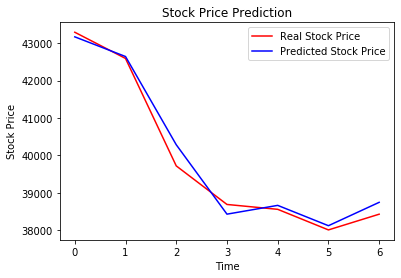

### Random Forest w/ Grid Search
We decided to run Random Forest with Grid Search on our dataset. Surprisingly, this resulted in an even worse mean squared error of JP¥158637.1531 ($1208.66 USD) more than 2 times worse than our baseline linear regression. We attempted to standardize the data to see if it would improve our MSE, but our new MSE was basically the same, JP¥ 153671.9183 ($1170.83 USD). These were not the results we were expecting at all, so we attempted some feature engineering.

### Feature Engineering

After evaluating the performance of our random forest regression model with gridsearch and seeing that it was worse than our benchmark linear regression model, we wanted to make changes to our model to increase its performance. Part of this process involved feature engineering, in which we created new features using features from our original dataset. The new features we engineered were moving average (MA), relative strength index (RSI), and daily volume change. From research, we found that these predictors are heavily involved in machine learning techniques for predicting stock prices. We constructed MA and RSI variables for spans of 14, 30, 50, and 200 days. 

In [ ]:
feature_names = ['Open', 'High', 'Low', 'Close', 'Volume']
for n in [14, 30, 50, 200]:
    stock_data['ma' + str(n)] = talib.SMA(stock_data['Close'].values, timeperiod=n)
    stock_data['rsi' + str(n)] = talib.RSI(stock_data['Close'].values, timeperiod=n)

    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

After executing our new random forest regression model with these added features, not only did we see better performance out of our model than our benchmark linear regression model, but we also found that our 14-day moving average feature that was constructed was the most important feature in predicting 5-day close price change percent.

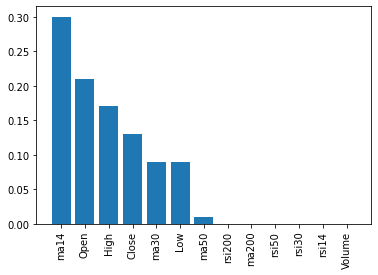

### Updating Random Forest Algorithm

In addition to feature engineering, further research found that random forests would not be great at predicting singular closing values. Instead, the more industry-relevant metric of the five-day future percent change in closing price would be easier for the random forests algorithm and less subject to daily volatility. Thus, we updated our algorithm to optimize for this new metric. 

Here is the new grid-search we ran to optimize our hyper-parameters:

In [ ]:
grid = {'n_estimators': np.arange(100, 900, 200), 
        'max_depth': np.arange(1, 15, 1), 
        'max_features': [4, 8], 
        'random_state': [42],
        'oob_score' : [True],
        'bootstrap' : [True]}
test_scores = []

rf_model = RandomForestRegressor()

for g in ParameterGrid(grid):
    rf_model.set_params(**g) 
    rf_model.fit(X_train, y_train)
    test_scores.append(rf_model.oob_score)

best_index = np.argmax(test_scores)
print(test_scores[best_index], ParameterGrid(grid)[best_index])

Running the above grid-search gave us the following hyperparameters:  
```
{'random_state': 42, 'oob_score': True, 'n_estimators': 100, 'max_features': 4, 'max_depth': 1, 'bootstrap': True}
```

Given the number of estimators, we were concerned that our new model would overfit the training data and produce a poor result on our testing set. This concern was exacerbated by the plot of our model's predicted percent change versus the actual stock's percent change. 

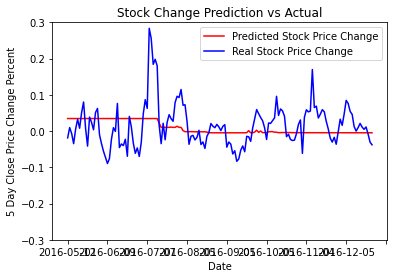

Surprisingly, however, the MSE and RMSE metrics with our new model did show a small improvement compared to the linear regression model. The table below captures the error metrics with all three models (random forests with grid search, random forests without grid search, linear regression).

| Model                                 | Mean Absolute Error | Mean Squared Error | Root Mean Squared Error |
|---------------------------------------|---------------------|--------------------|-------------------------|
| Random Forests without Grid Search    | 0.05991850191899629 | 0.0061315726497657 | 0.07830435907256825     |
| Random Forests with Grid Search       | 0.04540078144828159 | 0.0036221930277604 | 0.06018465774398317     |
| Linear Regression                     | 0.04256359546802597 | 0.0036955711366539 | 0.060791209369890915    |




# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

The main point of our results is that our random forest regression and linear regression models performed equally when it came to predicting 5-day Close Price Change Percent. However, random forest regression required a lot more work to achieve the same results.

1. Initially when we ran our random forest regression model, its performance was significantly worse than that of linear regression. Even when running Grid Search for hyper-parameter tuning and standardizing our dataset values, the MSE of our model was over double that of linear regression.

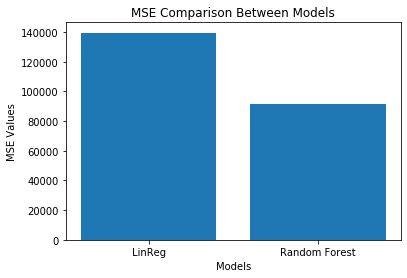

2. After conducting further research into stock price prediction, we feature engineered Moving Average and Relative Strength Index variables for spans of 14, 30, 50, and 200 days. Running our model with these added variables allowed our model to perform equally with linear regression.

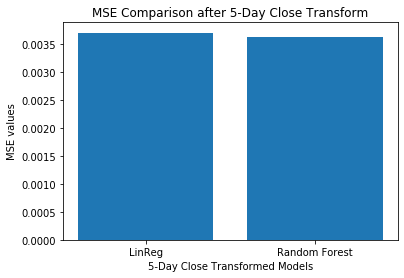

### Limitations

In terms of limitations, we believe that there are definitely constraints when dealing with chronological stock data. For example, our train/test split was a chronological 85/15 split. As a result, the data used for the training and testing sets were not shuffled or randomly selected, meaning there could be significant differences between the two datasets. In addition, current events such as earnings calls could drastically affect data after certain date points, introducing large influences on chronological values that could potentially only exist in the testing set. So while more data could have helped the problem, the fundamental nature of the data was a limitation.

Our hyper-parameter tuning, while technically successful in reducing our error metrics, certainly still lost much of the shape of the actual results. We can see that the Random Forests model without tuned hyperparameters retained more shape overall, suggesting that if we had potentially tested more hyperparameters or tweaked the grid somewhat, it would have been possible to also capture more of the shape of the shape of the actual values. 

### Ethics & Privacy

In terms of ethics and privacy concerns, we do not consider our project to have serious ethical implications. Theoretically, if our model were to be perfectly accurate or highly accurate in predicting Uniqlo stock prices, one could use our model in their financial interest. On the flip side, if our model were incredibly bad and it were to be publicized as a great model, it could cause people to lose a lot of money if they were to adhere to our model. As a result, it is important to clarify that our project is not financial advice and should not be used to inform any personal financial decisions.

Another concern is the potential impact on market behavior. If the model is used to make significant financial decisions, it could potentially impact the stock prices and create a feedback loop where the model's predictions influence the market behavior, which in turn affects the stock prices. This could create unintended consequences and potential ethical issues that need to be considered.

### Conclusion

Overall, Random Forest is not a very good model to deploy when actually using real money to trade stocks. Random Forest performed just slightly better than our baseline linear regression model after some , although linear regression likely just performed well on our particular dataset due to the Uniqlo stock price movement being approximately linear in shape by chance in the time frame that we were looking at. In addition, we noticed significant overfitting in our model, which means any future predictions made with this model will probably not be trustworthy enough to bet real money on. Actual models that have been successfully deployed in real stock trading by companies like Citadel or BlackRock are much more complex and gatekept from the public.

# Footnotes
<a name="Tsay"></a>1.[^](#Tsay): Tsay, R. S. (2018). Analysis of Financial Time Series (3rd ed.). *Wiley.*<br> 
<a name="Engle"></a>2.[^](#Engle): Engle, R. F. (2001). GARCH 101: The Use of ARCH/GARCH Models in Applied Econometrics. *Journal of Economic Perspectives, *15(4), 157-168.<br>
<a name="Hochreiter"></a>3.[^](#Hochreiter): Hochreiter, S., & Schmidhuber, J. (1997). Long Short-Term Memory. *Neural Computation*, 9(8), 1735-1780.<br>
<a name="Zhang"></a>4.[^](#Zhang): Zhang, G., & Qi, Y. (2005). Neural Networks for Technical Analysis: A Study on KLCI. *International Journal of Intelligent Systems in Accounting, Finance and Management*, 13(1), 1-11.<br> 
<a name="Zhang2"></a>5.[^](#Zhang2): Zhang, G., Patuwo, B. E., & Hu, M. Y. (1998). Forecasting with Artificial Neural Networks: The State of the Art. *International Journal of Forecasting*, 14(1), 35-62.<br>
<a name="Zhang3"></a>6.[^](#Zhang3): Zhang, Y., Liu, Y., & Li, Y. (2019). Stock Price Prediction Using Convolutional Neural Network. IEEE Access, 7, 112505-112514.<br>
<a name="Qiu"></a>7.[^](#Qiu): Qiu, Z., Chen, X., Wu, Y., & Yang, Y. (2019). A Novel Hybrid Model for Stock Price Prediction Based on LSTM and GRU. IEEE Access, 7, 96655-96663.
